In [2]:
from decimal import *

In [3]:
getcontext().prec=100

In [24]:
import numpy as np
traj_rs = np.loadtxt('traj_rs.out')

In [35]:
from functools import partial

x0 = Decimal(0.6)
rs = [Decimal(i) for i in traj_rs]

def L_map(x, r):
    return 4 * r * x * (1 - x)

def x_gen(x0, r, steps):
    x = x0
    L_map_r = partial(L_map, r=r)
    for i in range(steps):
        yield x
        x = L_map_r(x)

In [31]:
import pylab as plt

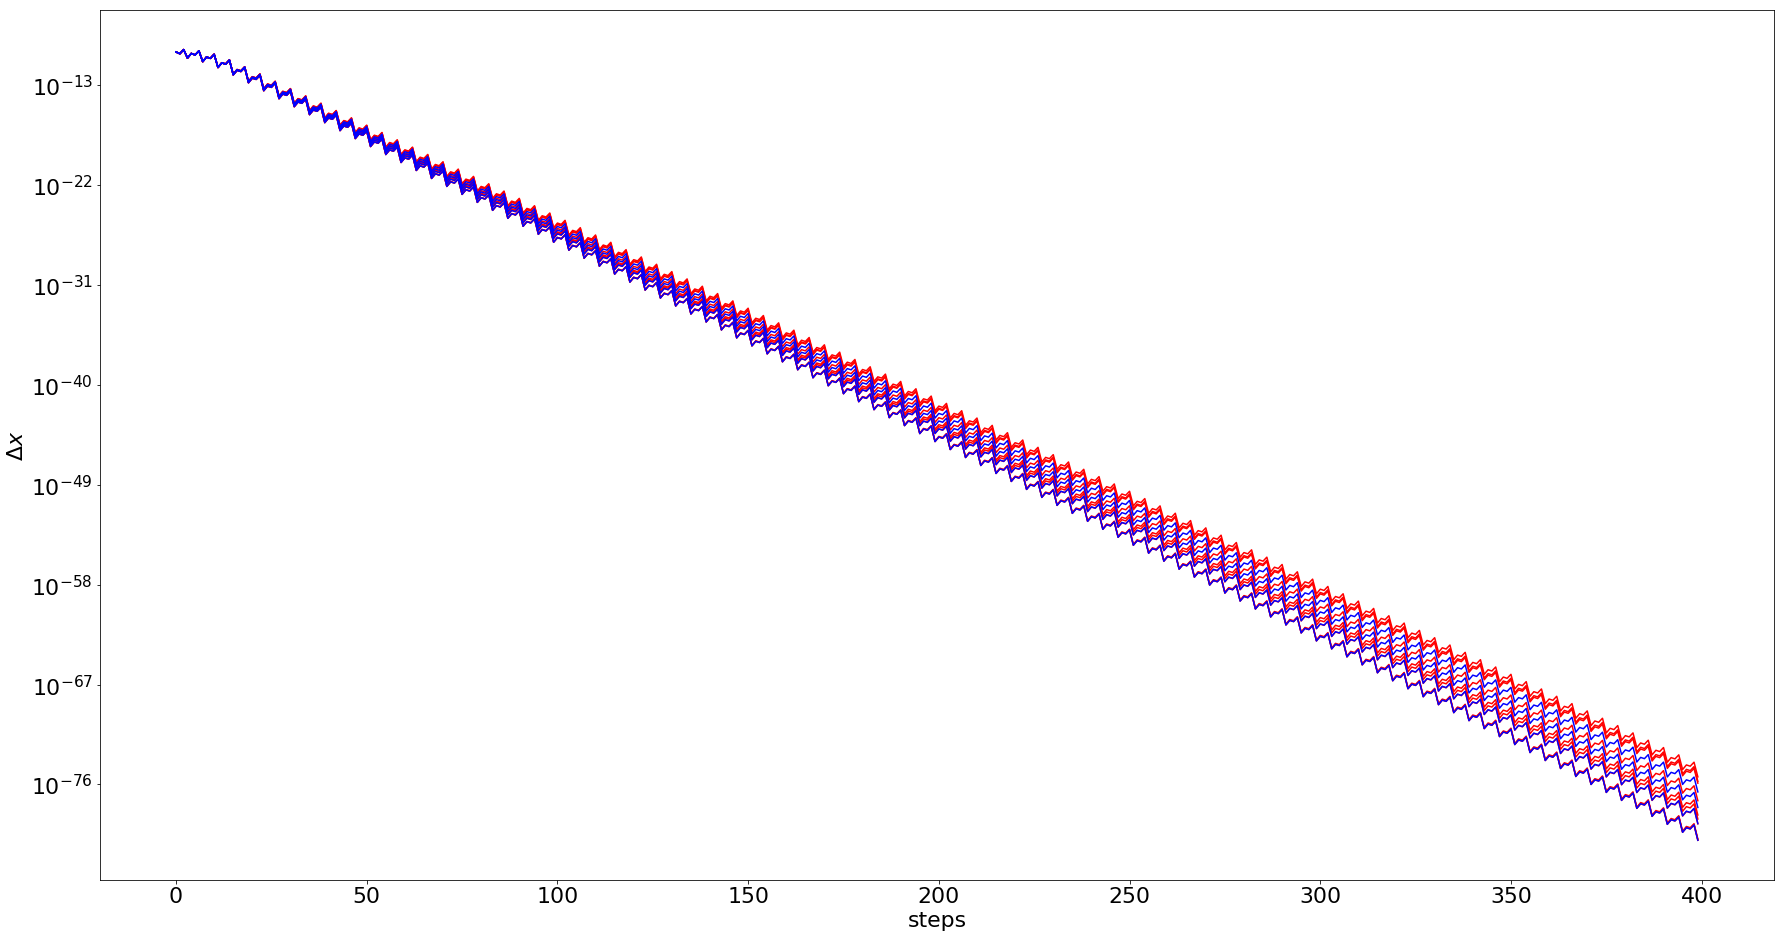

In [54]:
plt.rcParams.update({'font.size': 22})
fig, ax  = plt.subplots(figsize = (30,16))
ax.set(yscale='log', ylabel='$\Delta x$', xlabel='steps')
for r in rs:
    xs = list(x_gen(x0, r, 400))
    ys = list(x_gen(x0+Decimal(1.e-10), r, 400))
    diffs = [abs(y-x) for x, y in zip(ys, xs)]
    ax.plot(diffs, c='r')
r_max, r_min = max(rs), min(rs)
for i in range(1,5):
    r = i / Decimal(4) * (r_max - r_min) + r_min
    xs = list(x_gen(x0, r, 400))
    ys = list(x_gen(x0+Decimal(1.e-10), r, 400))
    diffs = [abs(y-x) for x, y in zip(ys, xs)]
    ax.plot(diffs, c='b')
plt.show()
fig.savefig('decimal.png')